## Shresht Mishra
## 211020450

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

In [4]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from skimage.segmentation import slic
from skimage.color import label2rgb

In [5]:
base_model = ResNet50(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.layers[-2].output)

102967424/102967424 [==============================] - 137s 1us/step


In [6]:
img_path = 't1.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

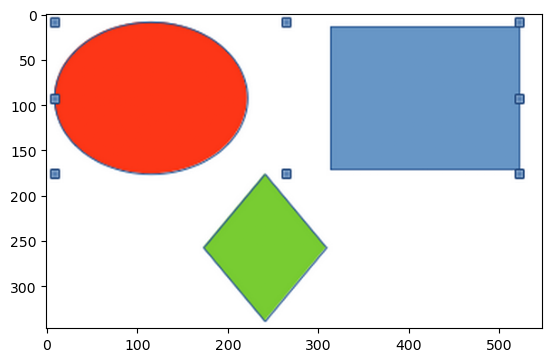

In [8]:
import matplotlib.image as img
testImage = img.imread('t1.png')
# displaying the image
plt.imshow(testImage)

In [9]:
preds = model.predict(x)

1/1 [==============================] - 1s 619ms/step


In [10]:
preds

array([[0.        , 0.97537416, 0.        , ..., 0.48811814, 0.7179767 ,
        0.5055681 ]], dtype=float32)

In [11]:
predicted_class = np.argmax(preds)
print(f"Predicted Class: {predicted_class}")

Predicted Class: 249


In [12]:
object_detection_model = tf.keras.applications.ResNet50(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

# Load image for object detection
img_detection = image.load_img(img_path, target_size=(224, 224))
x_detection = image.img_to_array(img_detection)
x_detection = np.expand_dims(x_detection, axis=0)
x_detection = preprocess_input(x_detection)

# Get predictions for object detection
predictions = object_detection_model.predict(x_detection)
decoded_predictions = decode_predictions(predictions)
print(len(decoded_predictions[0]))
print(decoded_predictions)

1/1 [==============================] - 1s 613ms/step
5
[[('n03291819', 'envelope', 0.8889071), ('n06359193', 'web_site', 0.056894362), ('n02840245', 'binder', 0.021381807), ('n04554684', 'washer', 0.0029653062), ('n04118776', 'rule', 0.002771246)]]


In [13]:
print(len(decoded_predictions[0]))

5


In [16]:
# Perform Image Segmentation
img_segmentation = plt.imread(img_path)

# Perform SLIC segmentation
segments = slic(img_segmentation, n_segments=100, compactness=10, sigma=1)
segmented_img = label2rgb(segments, img_segmentation, kind='avg')

# Display the segmented image
plt.subplot(1, 2, 1)
plt.imshow(img_segmentation)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img)
plt.title('Segmented Image')
plt.axis('off')

plt.show()

ValueError: shape mismatch: value array of shape (4,) could not be broadcast to indexing result of shape (3844,3)